<style>
    pre {
        white-space: pre-wrap;
        word-wrap: break-word;
    }
</style>

<div style="display:flex; justify-content:space-around; align-items:center; background-color:#cccccc; padding:5px; border:2px solid #333333;">
    <a href="https://estudios.upct.es/grado/5251/inicio" target="_blank">
    <img src="https://www.upct.es/contenido/universidad/galeria/identidad-2021/logos/logos-upct/marca-upct/marca-principal/horizontal/azul.png" alt="UPCT" style="height:145px; width:auto;">
    <a href="https://www.um.es/web/estudios/grados/ciencia-ingenieria-datos/" target="_blank">
    <img src="https://www.um.es/documents/1073494/42130150/LogosimboloUMU-positivo.png" alt="UMU" style="height:200px; width:auto;">
</div>


## Práctica 4: Codificadores automáticos
### **Sesión 2/3: Autocodificadores convolucionales**



<a class='anchor' id='dataset'></a>

## El dataset CelebA

En esta sesión de prácticas emplearemos el dataset [50k Celeba Dataset 64x64](https://www.kaggle.com/datasets/therealcyberlord/50k-celeba-dataset-64x64) construido con 50.000 imágenes de caras centradas y recortadas a un tamaño reducido de 64x64. Se trata de un subcojunto de imágenes procesadas, extraídas del extenso dataset *Large-scale CelebFaces Attributes* [(CelebA)](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html), con el objetivo de reducir las necesidades de cómputo cuando se experimenta con los *autoencoders*. El código que se presenta a continuación carga únicamente 10.000 imágenes, suficientes para la mayoría de los experimentos. No obstante, este número de imágenes puede aumentarse modificando la variable ```NUMBER_OF_IMAGES```. Se generan las imágenes tanto en color (```images```) como en escala de grises (```images_gray```).

In [1]:
# Importar librerías necesarias
import os
import numpy as np
from tensorflow.keras.utils import get_file
from tensorflow.image import rgb_to_grayscale
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Descargar el dataset
dataset_url = "https://www.kaggle.com/api/v1/datasets/download/therealcyberlord/50k-celeba-dataset-64x64"

dataset_path = get_file(origin=dataset_url, extract=True)

base_dir = os.path.join(os.path.dirname(dataset_path), '50k-celeba-dataset-64x64', '50k')
try:
    os.listdir(base_dir)
except:
    base_dir = os.path.join(os.path.dirname(dataset_path), '50k')

print(f"Leyendo imágenes desde {base_dir:s}")

# Preparar listas para imágenes
NUMBER_OF_IMAGES = 10000 # <= 50000
IMAGE_DIM = (64, 64)

images = np.empty((NUMBER_OF_IMAGES, *IMAGE_DIM, 3))
images_gray = np.empty((NUMBER_OF_IMAGES, *IMAGE_DIM, 1))
for i, img_file in enumerate(os.listdir(base_dir)):
    if (i > 0) and (i%1000 == 0):
        print(f"Cargadas {i:d} imágenes...")
    if i == NUMBER_OF_IMAGES:
        break
    img_path = os.path.join(base_dir, img_file)
    img = load_img(img_path, target_size=IMAGE_DIM, color_mode='rgb')   # Redimensionar imágenes
    images[i] = img_to_array(img) / 255.0            # Normalizar a [0, 1]
    images_gray[i] = rgb_to_grayscale(images[i])

Leyendo imágenes desde C:\Users\ruben\.keras\datasets\50k
Cargadas 1000 imágenes...
Cargadas 2000 imágenes...
Cargadas 3000 imágenes...
Cargadas 4000 imágenes...
Cargadas 5000 imágenes...
Cargadas 6000 imágenes...
Cargadas 7000 imágenes...
Cargadas 8000 imágenes...
Cargadas 9000 imágenes...
Cargadas 10000 imágenes...


In [131]:
# Descargar el dataset
dataset_url = "https://www.kaggle.com/api/v1/datasets/download/therealcyberlord/50k-celeba-dataset-64x64"

dataset_path = get_file(origin=dataset_url, extract=True)

base_dir = os.path.join(os.path.dirname(dataset_path), '50k-celeba-dataset-64x64', '50k')
try:
    os.listdir(base_dir)
except:
    base_dir = os.path.join(os.path.dirname(dataset_path), '50k')

print(f"Leyendo imágenes desde {base_dir:s}")

# Preparar listas para imágenes
NUMBER_OF_IMAGES_25k = 25000 # <= 50000
IMAGE_DIM = (64, 64)

images_25k = np.empty((NUMBER_OF_IMAGES_25k, *IMAGE_DIM, 3))
images_25k_gray = np.empty((NUMBER_OF_IMAGES_25k, *IMAGE_DIM, 1))
for i, img_file in enumerate(os.listdir(base_dir)):
    if (i > 0) and (i%1000 == 0):
        print(f"Cargadas {i:d} imágenes...")
    if i == NUMBER_OF_IMAGES_25k:
        break
    img_path = os.path.join(base_dir, img_file)
    img = load_img(img_path, target_size=IMAGE_DIM, color_mode='rgb')   # Redimensionar imágenes
    images_25k[i] = img_to_array(img) / 255.0            # Normalizar a [0, 1]
    images_25k_gray[i] = rgb_to_grayscale(images_25k[i])

Leyendo imágenes desde C:\Users\ruben\.keras\datasets\50k
Cargadas 1000 imágenes...
Cargadas 2000 imágenes...
Cargadas 3000 imágenes...
Cargadas 4000 imágenes...
Cargadas 5000 imágenes...
Cargadas 6000 imágenes...
Cargadas 7000 imágenes...
Cargadas 8000 imágenes...
Cargadas 9000 imágenes...
Cargadas 10000 imágenes...
Cargadas 11000 imágenes...
Cargadas 12000 imágenes...
Cargadas 13000 imágenes...
Cargadas 14000 imágenes...
Cargadas 15000 imágenes...
Cargadas 16000 imágenes...
Cargadas 17000 imágenes...
Cargadas 18000 imágenes...
Cargadas 19000 imágenes...
Cargadas 20000 imágenes...
Cargadas 21000 imágenes...
Cargadas 22000 imágenes...
Cargadas 23000 imágenes...
Cargadas 24000 imágenes...
Cargadas 25000 imágenes...


<a class='anchor' id='conv_autoencoder'></a>

## *Autoencoder* convolucional

Continuando con el trabajo de la sesión anterior, en esta sesión se experimentará con un *autoencoder* convolucional (CAE), en el que la idea básica radica en reemplazar las capas totalmente conectadas (empleadas en la sesión anterior) por capas convolucionales, lo que generalmente permite capturar las características geométricas o espaciales, así como reducir el número de parámetros, lo que puede conducir a una mayor eficiencia y a un menor riesgo de sobreajuste. A grandes rasgos y para dimensión 2D de los datos de entrada (imágenes), la arquitectura de red sería similar a la mostrada en la siguiente figura.

<div style="display:flex; justify-content:space-around; align-items:center; padding:5px solid #333333;">
    <a href="https://arc.fiu.edu/projects/artificial-intelligence-for-em-problem-set-dd/attachment/convolutional-autoencoder-cae-architecture/" target="_blank">
    <img src="imgs/Convolutional-AutoEncoder-CAE-architecture.png" style="height:500px; width:auto;">
</div>

Se denomina campo receptivo a la región del espacio de entrada que después de la operación de convolución afecta, o da como resultado, una característica dentro de un mapa de características a la salida. 

El campo receptivo es importante tanto en un CAE como en cualquier CNN, porque determina el contexto o la información a la que tiene acceso una neurona a la hora de hacer una predicción. 

El campo receptivo de una neurona está determinado por el tamaño del núcleo de convolución utilizado en la capa convolucional (```kernel_size```) y por el paso o zancada con la la que se calcula la convolución (```strides```). Un tamaño mayor del núcleo o de la zancada da como resultado un campo receptivo más amplio, lo que significa que cada neurona tiene acceso a más contexto o información de la imagen o mapa de características de entrada. En el codificador, el número de mapas de caractarísticas resultantes en cada nivel (```filters```) suele crecer en potencias de 2 conforme decrecen las dimensiones de la entrada, también en potencias de 2. Y en el decodificador la dimesionalidad de los datos se va recuperando de forma simétrica al codificador hasta la salida.

Por otra parte, existen numerosas variantes o combinaciones de capas accesorias para construir las pirámides de codificación-decodificación. Una de las opciones más habituales para la configuración de cada uno de los niveles de profundidad es la propuesta en esta práctica, en la que construiremos cada nivel convolucional de la pirámide con las siguientes capas (aplicable a imágenes, o datos de entrada 2D):

**Nivel del codificador** (con núcleo de convolución 3x3)
```python
Conv2D(filters, kernel_size = 3, strides = 2, padding = 'same')
BatchNormalization()
LeakyReLU()
```

**Nivel del decodificador** (con núcleo de convolución 3x3)
```python
Conv2DTranspose(filters, kernel_size = 3, strides = 2, padding = 'same')
BatchNormalization()
LeakyReLU()
```

Además de las habituales capas no entrenables de redimensionamiento de datos (```Flatten```, ```Reshape```, etc.) se suele hacer uso de otras capas entrenables y eficientes para enlazar con el espacio latente o con la capa de salida (```SeparableConv2D```, ```Conv2DTranspose```, ```DepthwiseConv2D```, ```GlobalAveragePooling2D```, etc.), evitando casi por completo el uso de capas completamente conectadas.

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import r2_score 

<a class='anchor' id='ejercicios'></a>

## Ejercicios

**E1:** Partiendo del trabajo de la sesión anterior, diseñe un *autoencoder* totalmente conectado de hasta 3 niveles de profundidad (adicionales al espacio latente), utilizando capas densas de 512, 256 y 128 neuronas con activación ReLU, que pueda funcionar con imágenes (dimensionalidad 2D de los datos de entrada). 

**Para que el AE denso pueda funcionar tendremos que redimensionar las imágenes mediante un aplanado obteneniendo así vectrores 1-d con el tamaño de la longitud de píxeles (64x64 = 4096 píxeles), este aplanado lo conseguimos con la capa previa de `Flatten`.**

Experimente con el aumento o disminución en potencias de 2 del número de neuronas de la pirámide, aumentando progresivamente el número de parámatros entrenables. Evalue visual y númericamente los resultados de reconstrucción obtenidos, adaptando las representaciones y métricas propuestas en el enunciado de la sesión 1 de esta práctica.

**Vamos a construir dos autoencoders modificando incrementalmente el número de neuronas de las capas densas, posteriormente evaluaremos ambos modelos visualmente mostrando algunas muestras con su `ground_truth` y su restauración tras pasar por el AE y mediante métricas como `R^2`, `MAE` Y `SSIM` que pueden ser claves para conocer la calidad de la reconstrucción.**

- **R^2:** Coeficiente de determinación que mide la calidad global de la restauración realizada.
- **MAE:** Error absoluto medio de la reconstrucción evaluado píxel a píxel.
- **SSIM:** mide cuán perceptualmente similar es una imagen restaurada respecto a la original, y ayuda a evaluar la calidad de modelos de restauración de forma más alineada con el ojo humano.





### **MOSTRAMOS UNAS IMÁGENES DE EJEMPLO Y LA FORMA DE LOS DATASETS**

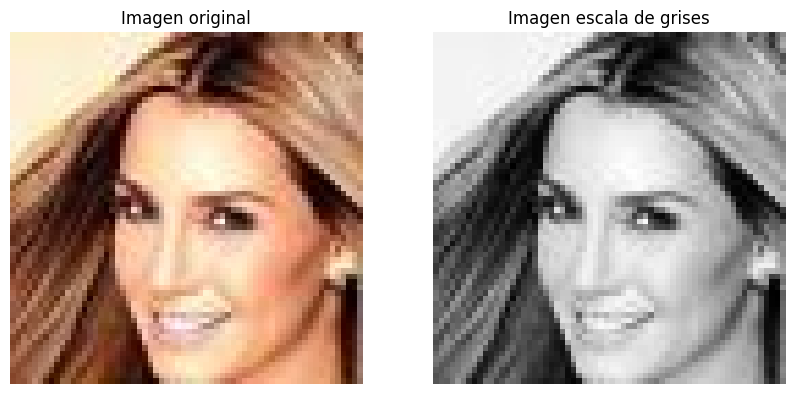

Dimesiones imágenes a color: (10000, 64, 64, 3)
Dimesiones imágenes en escala de grises: (10000, 64, 64, 1)


In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(images[0])
plt.axis('off')
plt.title('Imagen original')
plt.subplot(1, 2, 2)
plt.imshow(images_gray[0], cmap='gray')
plt.axis('off')
plt.title('Imagen escala de grises')
plt.show()

print(f"Dimesiones imágenes a color: {images.shape}")
print(f"Dimesiones imágenes en escala de grises: {images_gray.shape}")


In [137]:
# Definimos parámetros de entrenamiento y de arquitectura

INPUT_DIM_SHAPE = images_gray.shape[1:] 
FLATTENED_DIM = np.prod(INPUT_DIM_SHAPE) # 64 * 64 * 1 = 4096
LATENT_DIM = 64 # Dimensión del espacio latente
EPOCHS = 200 # Número de épocas 
BATCH_SIZE = 32 # Tamaño del lote

# Dividimos en entrenamiento y prueba para evaluar
x_train, x_test = train_test_split(images_gray, test_size=0.2, random_state=42)
print(f"Datos de entrenamiento: {x_train.shape}")
print(f"Datos de prueba: {x_test.shape}")

x_train_rgb, x_test_rgb = train_test_split(images, test_size=0.2, random_state=42)
print(f"Datos de entrenamiento RGB: {x_train_rgb.shape}")
print(f"Datos de prueba RGB: {x_test_rgb.shape}")

x_train_25k, x_test_25k = train_test_split(images_25k, test_size=0.2, random_state=42)
print(f"Datos de entrenamiento RGB 25k: {x_train_25k.shape}")
print(f"Datos de prueba RGB 25k: {x_test_25k.shape}")

Datos de entrenamiento: (8000, 64, 64, 1)
Datos de prueba: (2000, 64, 64, 1)
Datos de entrenamiento RGB: (8000, 64, 64, 3)
Datos de prueba RGB: (2000, 64, 64, 3)
Datos de entrenamiento RGB 25k: (20000, 64, 64, 3)
Datos de prueba RGB 25k: (5000, 64, 64, 3)


### **ARQUITECTURA DEL FC AUTOENCODER + FUNCIÓN DE COMPILACIÓN Y ENTRENAMIENTO DE MODELO**

In [16]:
def fc_autoencoder(DIM1, DIM2, DIM3, LATENT_DIM):

    input_img = Input(shape=INPUT_DIM_SHAPE, name='encoder_input')

    # Encoder
    # Aplanar la imagen 2D a un vector 1D
    x = Flatten()(input_img)

    # Capas densas del encoder
    x = Dense(DIM1, activation='relu')(x)
    x = Dense(DIM2, activation='relu')(x)
    x = Dense(DIM3, activation='relu')(x)

    # Capa del espacio latente (bottleneck)
    encoder_output = Dense(LATENT_DIM, name='latent_space')(x)
    encoder = Model(input_img, encoder_output, name='encoder')

    # Decoder
    # Entrada para el decoder
    decoder_input = Input(shape=(LATENT_DIM,), name='decoder_input')

    # Capas densas del decoder
    x = Dense(DIM3, activation='relu')(decoder_input)
    x = Dense(DIM2, activation='relu')(x)
    x = Dense(DIM1, activation='relu')(x)

    # Capa de salida para reconstruir: Fijamos la dimensión del vector de salida igual al vector aplanado en la entrada y remodelamos a la forma de imagen original
    x = Dense(FLATTENED_DIM)(x) 
    decoder_output = Reshape(INPUT_DIM_SHAPE, name='decoder_output')(x)
    decoder = Model(decoder_input, decoder_output, name='decoder')



    # Autoencoder Completo
    autoencoder_input = input_img
    autoencoder_output = decoder(encoder(autoencoder_input))

    autoencoder = Model(autoencoder_input, autoencoder_output, name='autoencoder')

    return autoencoder, encoder, decoder

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True, verbose=1, min_delta=0.0001)





def compilacion_y_entrenamiento_AE(autoencoder, x_train):
    # Compilación del modelo
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    autoencoder.summary()

    # Entrenamiento del modelo
    history = autoencoder.fit(x_train, x_train,
                              epochs=EPOCHS,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              validation_split=0.1, # 10% de validación
                              callbacks=[early_stopping],
                              verbose=1) 

    return history

- ###  **FC Autoencoder 1**: (512, 256, 128, Espacio Latente de 64)

Podemos observar como el número de parámetros entrenables es bastante grande en este tipo de arquitectura totalemente conectadas, ahora, cuando en el segundo AE incrementemos el número de neuronas, vamos a poder ver como aumenta el número de parámetros de forma exponencial.

In [6]:
FC_autoencoder1, encoder1, decoder1 = fc_autoencoder(512, 256, 128, LATENT_DIM)
history1 = compilacion_y_entrenamiento_AE(FC_autoencoder1, x_train)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 1)]       0         
                                                                 
 encoder (Functional)        (None, 64)                2270144   
                                                                 
 decoder (Functional)        (None, 64, 64, 1)         2274176   
                                                                 
Total params: 4,544,320
Trainable params: 4,544,320
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
225/225 [==============================] - 2s 7ms/step - loss: 0.1413 - mae: 0.1413 - val_loss: 0.1165 - val_mae: 0.1165
Epoch 2/200
225/225 [==============================] - 1s 6ms/step - loss: 0.1116 - mae: 0.1116 - val_loss: 0.1065 - val_mae: 0.1065
Epoch 3/200
225/225 [======================

**EVALUACIÓN DE LA RECONSTRUCCIÓN MEDIANTE MÉTRICAS NUMÉRICAS**

In [ ]:
# Predicción/Reconstrucción de las imágenes de prueba
reconstructed_imgs = FC_autoencoder1.predict(x_test)

# Calcular MAE (Mean Absolute Error)
mae = np.mean(np.abs(x_test - reconstructed_imgs))
print(f"Pérdida MAE: {mae:.6f}")

# Calcular SSIM (Structural Similarity Index Measure)
ssim_scores = []
for i in range(len(x_test)):
    original_img = np.squeeze(x_test[i])
    reconstructed_img = np.squeeze(reconstructed_imgs[i])
    score = ssim(original_img, reconstructed_img, data_range=1.0)
    ssim_scores.append(score)
avg_ssim = np.mean(ssim_scores)
print(f"SSIM promedio: {avg_ssim:.6f}")

# Calcular Coeficiente de Determinación R2
r2_scores_per_image = np.zeros(len(x_test))
for i in range(len(x_test)):
    # Aplanamos cada imagen para calcular R2
    original_flat = x_test[i].flatten()
    reconstructed_flat = reconstructed_imgs[i].flatten()
    r2_scores_per_image[i] = r2_score(original_flat, reconstructed_flat)

mean_r2 = np.mean(r2_scores_per_image)
print(f"Calidad de reconstrucción (coeficiente R2 medio): {mean_r2*100:.2f} %")

# --- Calcular Tasa de Compresión ---
# Usamos FLATTENED_DIM que es el np.prod de INPUT_DIM_SHAPE
tc = (LATENT_DIM / FLATTENED_DIM) * 100
print(f"Compresión de la codificación: {tc:.2f} %")
print(f"Factor de reducción de dimensionalidad: {FLATTENED_DIM / LATENT_DIM:.2f}x")

63/63 [==============================] - 0s 7ms/step
Pérdida MAE en datos de prueba: 0.072471
SSIM promedio en datos de prueba: 0.571084
Calidad de reconstrucción (coeficiente R2 medio): 80.14 %
Compresión de la codificación: 3.12 %
Factor de reducción de dimensionalidad: 32.00x


**VISUALIZACIÓN DE MUESTRAS: Ground_Truth y Reconstrucciones realizadas**

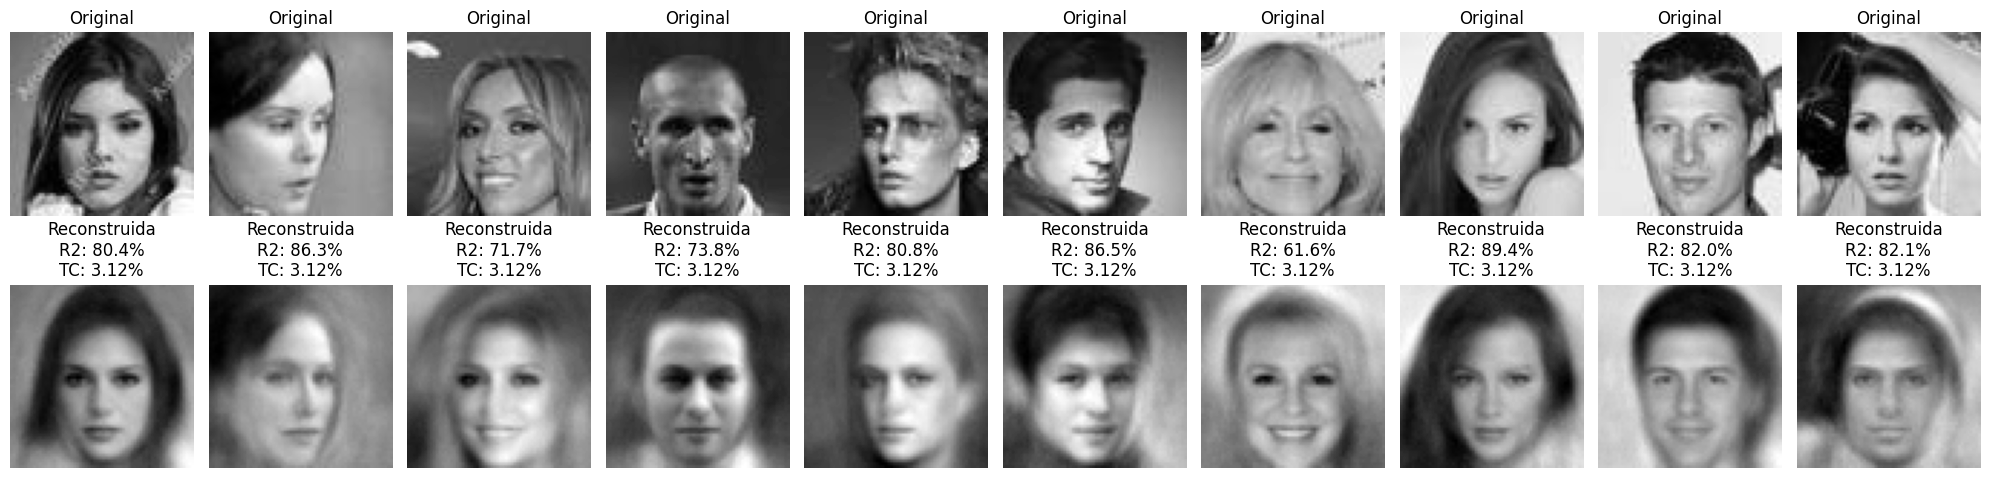

In [15]:
def plot_reconstructions_with_r2_and_tc(original, reconstructed, r2_scores, tc,  n=10):
    plt.figure(figsize=(20, 5)) 
    indices = np.random.choice(len(original), n, replace=False) # Elige n imágenes al azar

    for i, idx in enumerate(indices):
        # Imagen original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(np.squeeze(original[idx]), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Imagen reconstruida
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(np.squeeze(reconstructed[idx]), cmap='gray')
        # Mostrar R2 para esta imagen específica
        plt.title(f"Reconstruida\nR2: {r2_scores[idx]*100:.1f}%\nTC: {tc:.2f}%")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Mostrar algunas reconstrucciones del conjunto de prueba con su R2
plot_reconstructions_with_r2_and_tc(x_test, reconstructed_imgs, r2_scores_per_image, tc, n=10)


- ###  **FC Autoencoder 2**: (1024, 512, 256, Espacio Latente de 128) Incremento de x2 el número de neuronas en cada una de las capas ocultas del FC AE

In [24]:
LATENT_DIM = 128
fc_autoencoder2, encoder2, decoder2 = fc_autoencoder(1024, 512, 256, LATENT_DIM)

**Ahí podemos observar el incremento del número de parámetros entrenables al incluir más neuronas al modelo, ya estamos ante un modelo bastante pesado**

In [25]:
history2 = compilacion_y_entrenamiento_AE(fc_autoencoder2, x_train)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 1)]       0         
                                                                 
 encoder (Functional)        (None, 128)               4884352   
                                                                 
 decoder (Functional)        (None, 64, 64, 1)         4888320   
                                                                 
Total params: 9,772,672
Trainable params: 9,772,672
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
225/225 [==============================] - 3s 10ms/step - loss: 0.1633 - mae: 0.1633 - val_loss: 0.1244 - val_mae: 0.1244
Epoch 2/200
225/225 [==============================] - 2s 9ms/step - loss: 0.1181 - mae: 0.1181 - val_loss: 0.1138 - val_mae: 0.1138
Epoch 3/200
225/225 [=====================

In [26]:
# Predicción/Reconstrucción de las imágenes de prueba
reconstructed_imgs = fc_autoencoder2.predict(x_test)

# Calcular MAE (Mean Absolute Error) manualmente
mae = np.mean(np.abs(x_test - reconstructed_imgs))
print(f"Pérdida MAE en datos de prueba: {mae:.6f}")

# Calcular SSIM (Structural Similarity Index Measure)
ssim_scores = []
for i in range(len(x_test)):
    original_img = np.squeeze(x_test[i])
    reconstructed_img = np.squeeze(reconstructed_imgs[i])
    score = ssim(original_img, reconstructed_img, data_range=1.0)
    ssim_scores.append(score)
avg_ssim = np.mean(ssim_scores)
print(f"SSIM promedio en datos de prueba: {avg_ssim:.6f}")

# Calcular Coeficiente de Determinación R2
r2_scores_per_image = np.zeros(len(x_test))
for i in range(len(x_test)):
    # Aplanar cada imagen para calcular R2
    original_flat = x_test[i].flatten()
    reconstructed_flat = reconstructed_imgs[i].flatten()
    r2_scores_per_image[i] = r2_score(original_flat, reconstructed_flat)

mean_r2 = np.mean(r2_scores_per_image)
print(f"Calidad de reconstrucción (coeficiente R2 medio): {mean_r2*100:.2f} %")

# Calcular Tasa de Compresión
tc = (LATENT_DIM / FLATTENED_DIM) * 100
print(f"Compresión de la codificación: {tc:.2f} %")
print(f"Factor de reducción de dimensionalidad: {FLATTENED_DIM / LATENT_DIM:.2f}x")

63/63 [==============================] - 0s 3ms/step
Pérdida MAE en datos de prueba: 0.083938
SSIM promedio en datos de prueba: 0.508462
Calidad de reconstrucción (coeficiente R2 medio): 73.89 %
Compresión de la codificación: 3.12 %
Factor de reducción de dimensionalidad: 32.00x


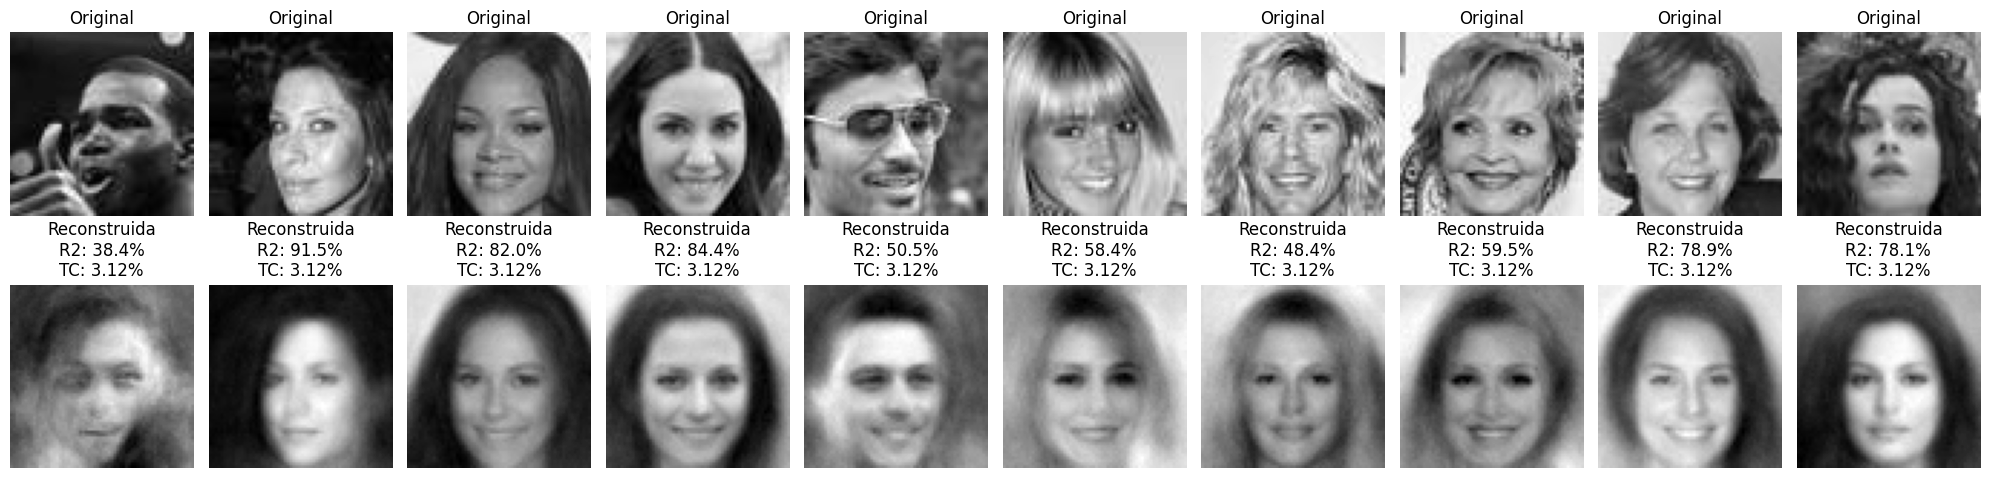

In [27]:
# Mostrar algunas reconstrucciones del conjunto de prueba con su R2
plot_reconstructions_with_r2_and_tc(x_test, reconstructed_imgs, r2_scores_per_image, tc, n=10)

- ###  **FC Autoencoder 3**: (256, 128, 64, Espacio Latente de 32) Incremento de x1/2 el número de neuronas en cada una de las capas ocultas del FC AE

In [28]:
LATENT_DIM = 32
fc_autoencoder3, encoder3, decoder3 = fc_autoencoder(256, 128, 64, LATENT_DIM)

In [29]:
history3 = compilacion_y_entrenamiento_AE(fc_autoencoder3, x_train)

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 1)]       0         
                                                                 
 encoder (Functional)        (None, 32)                1092064   
                                                                 
 decoder (Functional)        (None, 64, 64, 1)         1096128   
                                                                 
Total params: 2,188,192
Trainable params: 2,188,192
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
225/225 [==============================] - 2s 7ms/step - loss: 0.1502 - mae: 0.1502 - val_loss: 0.1227 - val_mae: 0.1227
Epoch 2/200
225/225 [==============================] - 1s 5ms/step - loss: 0.1142 - mae: 0.1142 - val_loss: 0.1110 - val_mae: 0.1110
Epoch 3/200
225/225 [======================

In [30]:
# Predicción/Reconstrucción de las imágenes de prueba
reconstructed_imgs = fc_autoencoder3.predict(x_test)

# Calcular MAE (Mean Absolute Error) manualmente
mae = np.mean(np.abs(x_test - reconstructed_imgs))
print(f"Pérdida MAE en datos de prueba: {mae:.6f}")

# Calcular SSIM (Structural Similarity Index Measure)
ssim_scores = []
for i in range(len(x_test)):
    original_img = np.squeeze(x_test[i])
    reconstructed_img = np.squeeze(reconstructed_imgs[i])
    score = ssim(original_img, reconstructed_img, data_range=1.0)
    ssim_scores.append(score)
avg_ssim = np.mean(ssim_scores)
print(f"SSIM promedio en datos de prueba: {avg_ssim:.6f}")

# Calcular Coeficiente de Determinación R2
r2_scores_per_image = np.zeros(len(x_test))
for i in range(len(x_test)):
    # Aplanar cada imagen para calcular R2
    original_flat = x_test[i].flatten()
    reconstructed_flat = reconstructed_imgs[i].flatten()
    r2_scores_per_image[i] = r2_score(original_flat, reconstructed_flat)

mean_r2 = np.mean(r2_scores_per_image)
print(f"Calidad de reconstrucción (coeficiente R2 medio): {mean_r2*100:.2f} %")

# Calcular Tasa de Compresión
tc = (LATENT_DIM / FLATTENED_DIM) * 100
print(f"Compresión de la codificación: {tc:.2f} %")
print(f"Factor de reducción de dimensionalidad: {FLATTENED_DIM / LATENT_DIM:.2f}x")

63/63 [==============================] - 0s 3ms/step
Pérdida MAE en datos de prueba: 0.081799
SSIM promedio en datos de prueba: 0.515022
Calidad de reconstrucción (coeficiente R2 medio): 74.61 %
Compresión de la codificación: 0.78 %
Factor de reducción de dimensionalidad: 128.00x


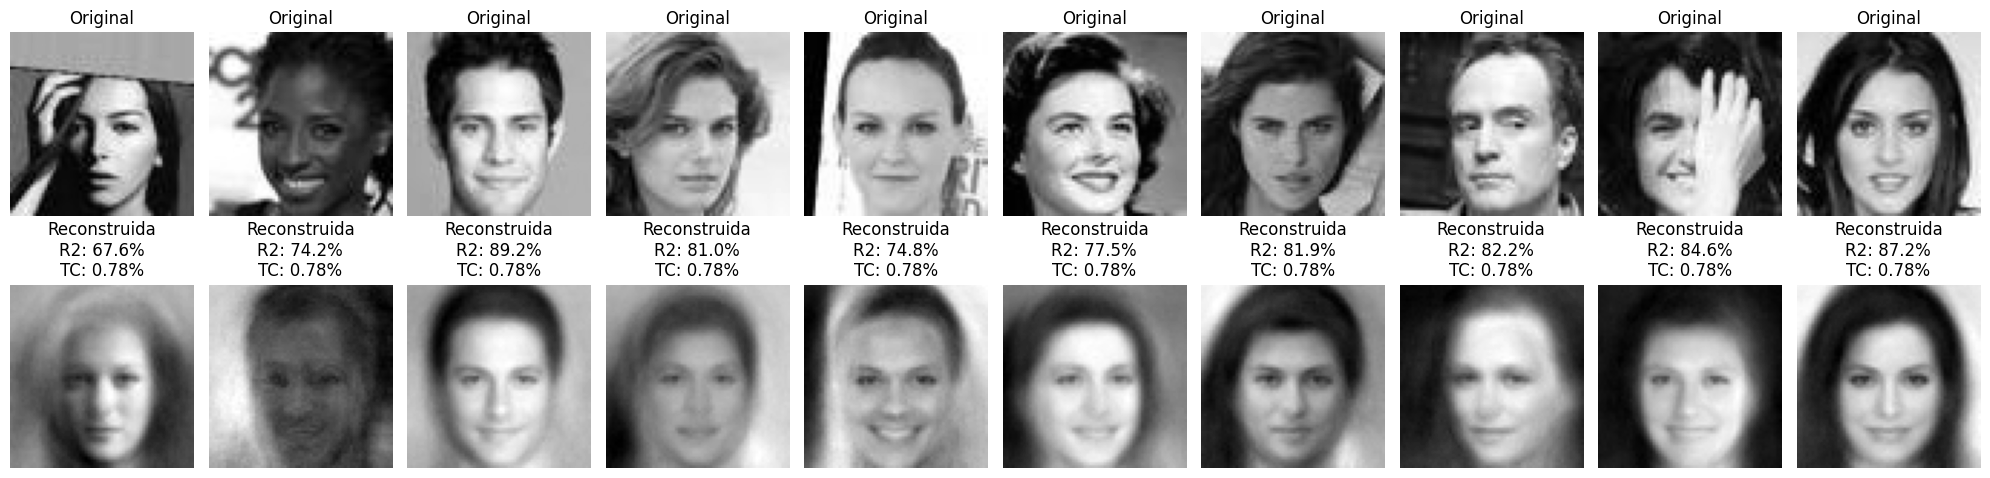

In [31]:
# Mostrar algunas reconstrucciones del conjunto de prueba con su R2
plot_reconstructions_with_r2_and_tc(x_test, reconstructed_imgs, r2_scores_per_image, tc, n=10)

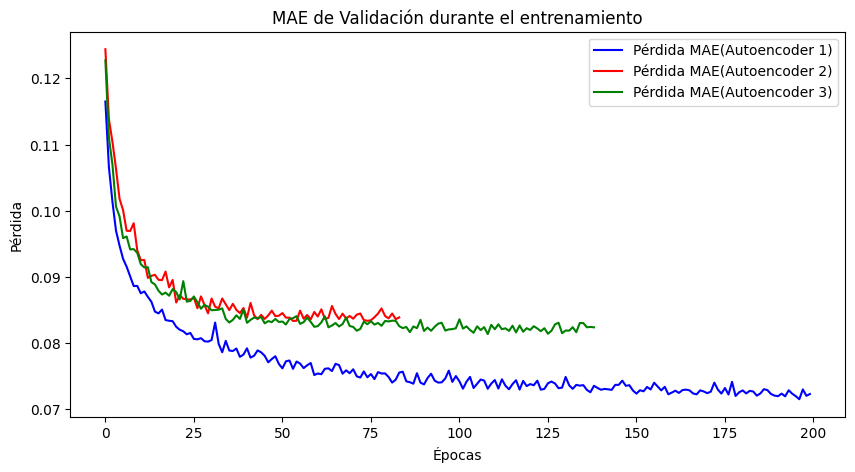

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(history1.history['val_loss'], label='Pérdida MAE(Autoencoder 1)', color='blue')
plt.plot(history2.history['val_loss'], label='Pérdida MAE(Autoencoder 2)', color='red')
plt.plot(history3.history['val_loss'], label='Pérdida MAE(Autoencoder 3)', color='green')
plt.title('MAE de Validación durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

**Observando las distintas métricas, la gráfica de la evolución del entrenamiento y las distintas muestras reconstruidas podemos concluir con que el mejor FC AE desarrollado ha sido el primero de todos, el que tenía la arquitectura especificada en el enunciado.**

**Viendo un poco las reconstrucciones realizadas por los distintos modelos puedo interpretar que este tipo de arquitectura tiende un poco al sobreajuste y trata de ajustarse correctamente a zonas no vitales de las imágenes como son los fondos, este segundo punto se debe a que estos modelos son entrenados sin conocer la estructura espacial intrínseca que tienen estos datos, por eso, les cuesta más conseguir asociar las distintas relaciones que deben tener los píxeles dentro de las imágenes.**

**El ejemplo claro se observa cuando los modelos tratan de reconstruir partes como las orejas, el pelo o las gafas, no son capaces por lo anteriormente comentado, no tienen disponible esa información de relación espacial entre píxeles cercanos ya que esta se rompe totalmente en la capa `Flatten()`.**

**E2:** Para obtener un *sparse autoencoder* y observar sus consecuencias en cuanto a codificación y reconstrucción, aplique una regularización de actividad L1 en la capa densa del espacio latente, así como activación ```ReLU```. Analice los resultados obtenidos en la codificación latente en comparación con los del ejercicio E1. Comente la diferencia observada en la reconstrucción y el espacio latente (calidad de reconstrucción, coeficientes no nulos obtenidos en el espacio latente, compresión efectiva de la codificación, etc.). *(Para reducción de cómputo puede utilizar las imágenes en escala de gris)*


In [35]:
from tensorflow.keras import regularizers

**PARÁMETROS ARQUITECTURA Y ENTRENAMIENTO**

In [55]:
INPUT_DIM_SHAPE = images_gray.shape[1:] 
FLATTENED_DIM = np.prod(INPUT_DIM_SHAPE) # 64 * 64 * 1 = 4096
LATENT_DIM = 64 # Dimensión del espacio latente
EPOCHS = 200 # Número de épocas 
BATCH_SIZE = 32 # Tamaño del lote

DIM1 = 512
DIM2 = 256
DIM3 = 128
LATENT_DIM = 64 # Dimensión del espacio latente
L1_LAMBDA = 10e-6 # L1 regularization lambda

### **ARQUITECTURA SPARSE AUTOENCODER MEDIANTE `Regularización L1` del Espacio Latente**

In [57]:
# Encoder
input_img = Input(shape=INPUT_DIM_SHAPE, name='encoder_input') 
x = Flatten()(input_img) 
x = Dense(DIM1, activation='relu')(x)
x = Dense(DIM2, activation='relu')(x)
x = Dense(DIM3, activation='relu')(x)

# Añadimos a la capa latente una función de activación ReLU y la regularización L1 para obtener un espacio latente disperso
activity_reg = regularizers.l1(L1_LAMBDA) 
encoder_output = Dense(LATENT_DIM, activation='relu', activity_regularizer=activity_reg, name='latent_space')(x) 
sparse_encoder = Model(input_img, encoder_output, name='sparse_encoder')


# Decoder
decoder_input = Input(shape=(LATENT_DIM,), name='decoder_input') 
x = Dense(DIM3, activation='relu')(decoder_input) 
x = Dense(DIM2, activation='relu')(x)
x = Dense(DIM1, activation='relu')(x)

x = Dense(FLATTENED_DIM)(x)
decoder_output = Reshape(INPUT_DIM_SHAPE, name='decoder_output')(x)
sparse_decoder = Model(decoder_input, decoder_output, name='sparse_decoder') 

# Autoencoder 
autoencoder_output = sparse_decoder(sparse_encoder(input_img))
sparse_autoencoder = Model(input_img, autoencoder_output, name='sparse_autoencoder')


### **COMPILACIÓN Y ENTRENAMIENTO DEL SPARSE AE**

In [58]:
compilacion_y_entrenamiento_AE(sparse_autoencoder, x_train)

Model: "sparse_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 1)]       0         
                                                                 
 sparse_encoder (Functional)  (None, 64)               2270144   
                                                                 
 sparse_decoder (Functional)  (None, 64, 64, 1)        2274176   
                                                                 
Total params: 4,544,320
Trainable params: 4,544,320
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
225/225 [==============================] - 1s 4ms/step - loss: 0.1572 - mae: 0.1568 - val_loss: 0.1210 - val_mae: 0.1206
Epoch 2/200
225/225 [==============================] - 1s 4ms/step - loss: 0.1170 - mae: 0.1166 - val_loss: 0.1137 - val_mae: 0.1133
Epoch 3/200
225/225 [===============

### **Análisis de los resultados obtenidos en la codificación latente en comparación con los del ejercicio E1:**

Podemos comprobar claramente como la regularización L1 hace su trabajo e introduce un sesgo inductivo en el entrenamiento del modelo, justamente en la función de pérdida a optimizar, que hace que se busque llevar a las activaciones/salidas de las neuronas lo más cercanas a cero.

El objetivo de esto es empujar a muchas de las activaciones, que no son significativas, a ser exactamente nulas (o muy cercanas a cero), mientras que sólo unas pocas activaciones (las más "importantes" para la reconstrucción) permanecerán significativamente diferentes de cero.

Por otro lado, observar que en el autoencoder denso no ocurre esto, todas las neuronas están interconectadas y no se les incita a llegar a una solución particular a partir de una regularización como es la L1 antes comentada. Podemos ver, por lo tanto que el espacio latente del FC AE no es disperso.

In [ ]:
print("Análisis de Sparsidad en el Espacio Latente del Sparse AE:")
encoded_imgs_sparse = sparse_encoder.predict(x_test)

# Calcular porcentaje medio de activaciones no nulas, activaciones nulas y número medio de neuronas activadas según un umbral de tolerancia definido
tolerance = 1e-5
non_zero_counts_sparse = np.sum(np.abs(encoded_imgs_sparse) > tolerance, axis=1)
avg_non_zero_sparse = np.mean(non_zero_counts_sparse)
percent_non_zero_sparse = (avg_non_zero_sparse / LATENT_DIM) * 100


print(f"Número medio de neuronas activadas por imagen: {avg_non_zero_sparse:.2f}")
print(f"Porcentaje medio de activaciones no nulas: {percent_non_zero_sparse:.2f} %")
print(f"Porcentaje medio de activaciones NULAS: {100.0 - percent_non_zero_sparse:.2f} %")

print("\nAnálisis de Sparsidad en el Espacio Latente del FC AE:")
encoded_imgs = encoder1.predict(x_test)

# Calcular porcentaje medio de activaciones no nulas, activaciones nulas y número medio de neuronas activadas según un umbral de tolerancia definido
tolerance = 1e-4
non_zero_counts = np.sum(np.abs(encoded_imgs) > tolerance, axis=1)
avg_non_zero_e1 = np.mean(non_zero_counts)
percent_non_zero = (avg_non_zero / LATENT_DIM) * 100


print(f"Número medio de neuronas activadas por imagen: {avg_non_zero_e1:.2f}")
print(f"Porcentaje medio de activaciones no nulas: {percent_non_zero:.2f} %")
print(f"Porcentaje medio de activaciones NULAS: {100.0 - percent_non_zero:.2f} %")

Análisis de Sparsidad en el Espacio Latente del Sparse AE:
63/63 [==============================] - 0s 4ms/step
Número medio de neuronas activadas por imagen: 19.82
Porcentaje medio de activaciones no nulas: 30.97 %
Porcentaje medio de activaciones NULAS: 69.03 %

Análisis de Sparsidad en el Espacio Latente del FC AE:
63/63 [==============================] - 0s 2ms/step
Número medio de neuronas activadas por imagen: 63.99
Porcentaje medio de activaciones no nulas: 99.98 %
Porcentaje medio de activaciones NULAS: 0.02 %


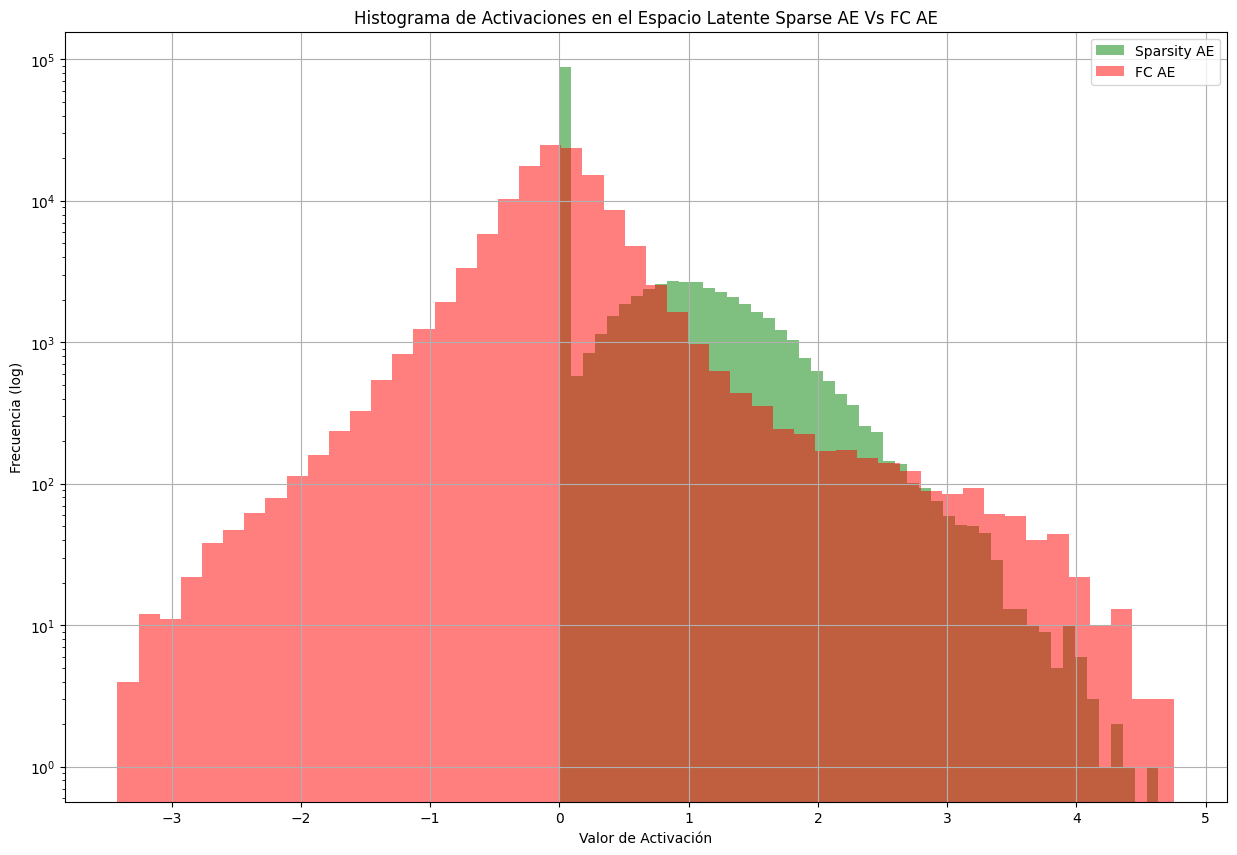

In [85]:
plt.figure(figsize=(15, 10))
plt.hist(encoded_imgs_sparse.flatten(), bins=50, log=True, alpha=0.5, color='green') # Usar escala logarítmica en Y
plt.hist(encoded_imgs.flatten(), bins=50, log=True, alpha=0.5, color='red') # Usar escala logarítmica en Y
plt.legend(['Sparsity AE', 'FC AE'])
plt.title('Histograma de Activaciones en el Espacio Latente Sparse AE Vs FC AE')
plt.xlabel('Valor de Activación')
plt.ylabel('Frecuencia (log)')
plt.grid(True)
plt.show()

**Lo que hemos comentado con anterioridad se observa claramente en este histograma conjunto, podemos ver como el espacio latente del FC AE tiene valores tanto positivos como negativos porque su función de activación es lineal y podemos ver como su forma no ha sido inducida por ninguna regularización, sin embargo, observando el histograma de las activaciones del espacio latente del Sparse AE podemos darnos cuenta del signo de esparsidad que nos muestra ese pico en x=0.**

### **Diferencias observadas en la reconstrucción y el espacio latente (métricas,calidad de reconstrucción, tasa de compresión absoluta y compresión efectiva de la codificación):**

In [71]:
from sklearn.metrics import mean_absolute_error

In [118]:
LATENT_DIM = 64 # Dimensión del espacio latente
# Realizamos predicciones mediante los encoders y autoencoders para el cálculo de distintas métricas
reconstructed_imgs_e1 = FC_autoencoder1.predict(x_test)
encoded_imgs_e1 = encoder1.predict(x_test)

reconstructed_imgs_sparse = sparse_autoencoder.predict(x_test)
encoded_imgs_sparse = sparse_encoder.predict(x_test)

# Cálculo de métricas de evaluación
# MAE 
mae_e1 = mean_absolute_error(x_test.reshape(len(x_test), -1), reconstructed_imgs_e1.reshape(len(x_test), -1))
mae_sparse = mean_absolute_error(x_test.reshape(len(x_test), -1), reconstructed_imgs_sparse.reshape(len(x_test), -1))

print(f"MAE:")
print(f"  Standard AE: {mae_e1:.6f}")
print(f"  Sparse AE:   {mae_sparse:.6f}")


# SSIM
def calculate_avg_ssim(original, reconstructed):
    scores = []
    for i in range(len(original)):
        img_orig = np.squeeze(original[i])
        img_rec = np.squeeze(reconstructed[i])
        scores.append(ssim(img_orig, img_rec, data_range=1.0))
    return np.mean(scores)

ssim_e1 = calculate_avg_ssim(x_test, reconstructed_imgs_e1)
ssim_sparse = calculate_avg_ssim(x_test, reconstructed_imgs_sparse)
print(f"\nSSIM:")
print(f"  Standard AE: {ssim_e1:.6f}")
print(f"  Sparse AE:   {ssim_sparse:.6f}")

# R2 Score 
def calculate_avg_r2(original, reconstructed):
    r2_scores_per_image = np.zeros(len(original))
    for i in range(len(original)):
        original_flat = original[i].flatten()
        reconstructed_flat = reconstructed[i].flatten()
        r2_scores_per_image[i] = r2_score(original_flat, reconstructed_flat)
    return np.mean(r2_scores_per_image), r2_scores_per_image

mean_r2_e1, r2_e1 = calculate_avg_r2(x_test, reconstructed_imgs_e1)
mean_r2_sparse, r2_sparse = calculate_avg_r2(x_test, reconstructed_imgs_sparse)
print(f"\nR2 Score:")
print(f"  Standard AE: {mean_r2_e1*100:.2f} %")
print(f"  Sparse AE:   {mean_r2_sparse*100:.2f} %")



# Análisis de compresión: Absoluta y Efectiva
def analyze_compression(latent_dim, avg_non_zero_activations, flattened_input_dim):
    nominal_ratio = (latent_dim / flattened_input_dim) * 100
    nominal_factor = flattened_input_dim / latent_dim if latent_dim > 0 else float('inf')

    effective_ratio = (avg_non_zero_activations / flattened_input_dim) * 100
    effective_factor = flattened_input_dim / avg_non_zero_activations if avg_non_zero_activations > 0 else float('inf')
    return nominal_ratio, nominal_factor, effective_ratio, effective_factor

nom_ratio_e1, nom_factor_e1, eff_ratio_e1, eff_factor_e1 = analyze_compression(LATENT_DIM, avg_non_zero_e1, FLATTENED_DIM)
nom_ratio_sparse, nom_factor_sparse, eff_ratio_sparse, eff_factor_sparse = analyze_compression(LATENT_DIM, avg_non_zero_sparse, FLATTENED_DIM)

print(f"\nTasa de compresión absoluta:")
print(f"  Standard AE: {nom_ratio_e1:.2f} % (Factor: {nom_factor_e1:.2f}x)")
print(f"  Sparse AE:   {nom_ratio_sparse:.2f} % (Factor: {nom_factor_sparse:.2f}x)")

print(f"\nTasa de compresión efectiva (basada en activaciones no nulas del espacio latente):")
print(f"  Standard AE: {eff_ratio_e1:.2f} % (Factor: {eff_factor_e1:.2f}x)")
print(f"  Sparse AE:   {eff_ratio_sparse:.2f} % (Factor: {eff_factor_sparse:.2f}x)")


63/63 [==============================] - 0s 2ms/step
MAE:
  Standard AE: 0.072471
  Sparse AE:   0.082986

SSIM:
  Standard AE: 0.571084
  Sparse AE:   0.513142

R2 Score:
  Standard AE: 80.14 %
  Sparse AE:   74.12 %

Tasa de compresión absoluta:
  Standard AE: 1.56 % (Factor: 64.00x)
  Sparse AE:   1.56 % (Factor: 64.00x)

Tasa de compresión efectiva (basada en activaciones no nulas del espacio latente):
  Standard AE: 1.56 % (Factor: 64.01x)
  Sparse AE:   0.48 % (Factor: 206.67x)


Tras observar las métricas de evaluación podemos comprobar que el autoencoder denso consigue una reconstrucción de mayor calidad pero no mucho mejor que el Sparse autoencoder teniendo en cuenta que este modelo genera un cuello de botella significativamente más pequeño que el autoencoder denso, estamos hablando de que el FC AE realiza una compresión efectiva de **64x** que es muy buena pero la capacidad de reconstrucción del Sparse autoencoder desde una compresión tan alta, hablamos de un factor de compresión del **206.67x**, sugiere que:

- El modelo Sparse ha aprendido una representación más eficiente y potencialmente más significativa. 
- La regularización L1 actúa como una forma de selección automática de características dentro del espacio latente.
- El modelo demuestra que no necesita las 64 dimensiones completas para una buena reconstrucción, una representación mucho más dispersa es suficiente.

### **CALIDAD DE RECONSTRUCCIÓN VISUAL:**


Showing comparative reconstruction examples...


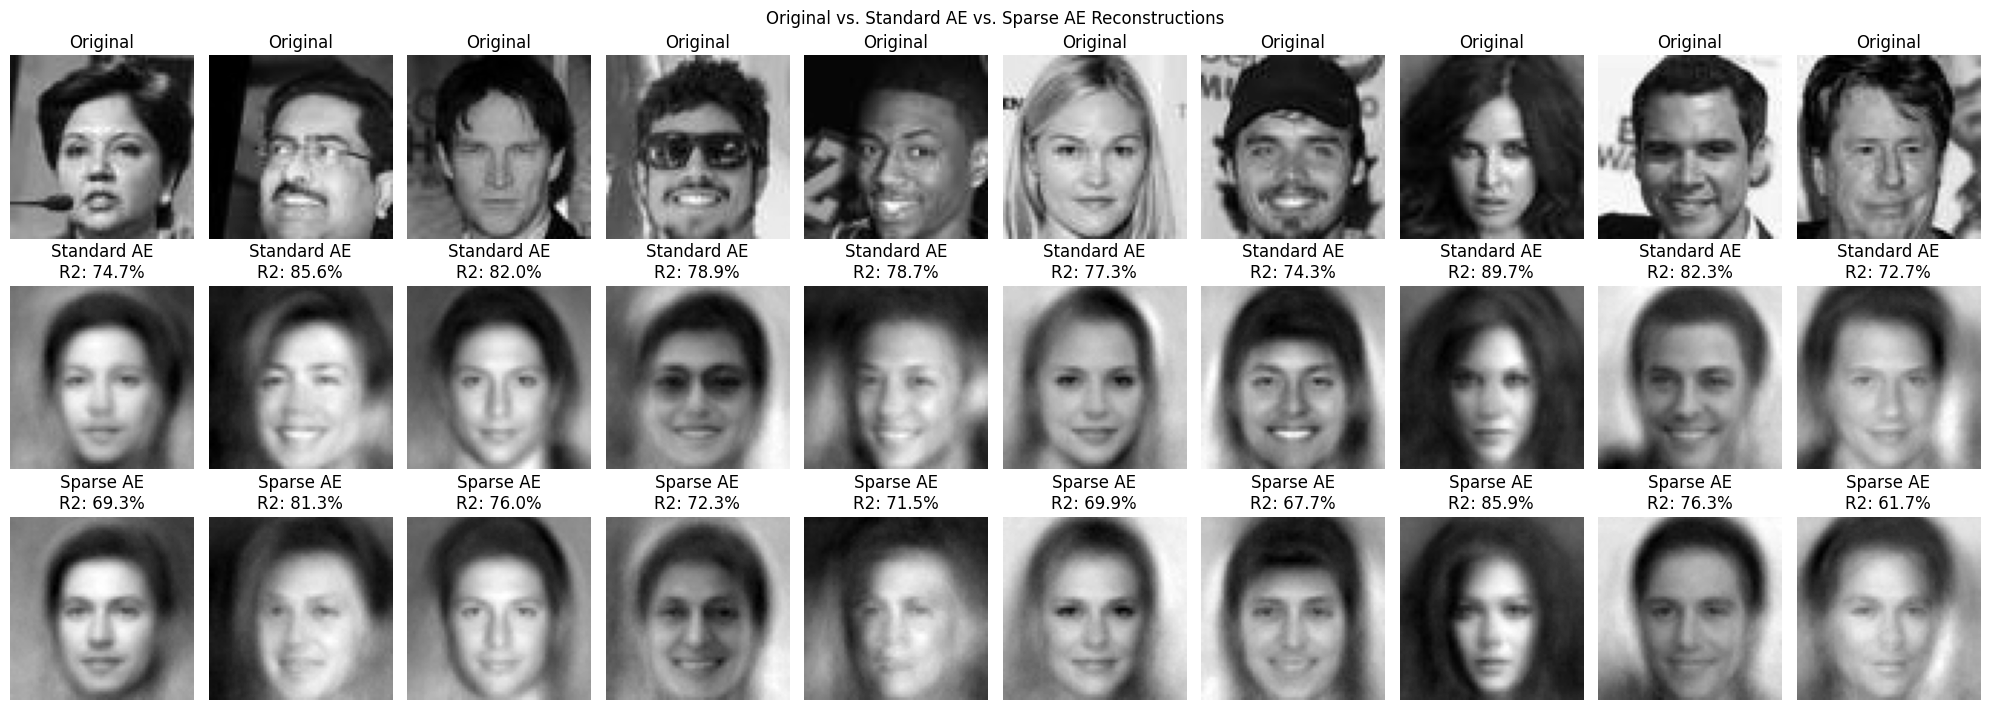

In [ ]:
def plot_reconstructions_comparison(original, recon_e1, recon_sparse, r2_e1, r2_sparse, n=10):
    plt.figure(figsize=(20, 7)) 
    indices = np.random.choice(len(original), n, replace=False)
    for i, idx in enumerate(indices):
        # Original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(np.squeeze(original[idx]), cmap='gray')
        plt.title("Original")
        plt.axis("off")

        # Reconstructed FC AE
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(np.squeeze(recon_e1[idx]), cmap='gray')
        plt.title(f"Standard AE\nR2: {r2_e1[idx]*100:.1f}%")
        plt.axis("off")

        # Reconstructed Sparse
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(np.squeeze(recon_sparse[idx]), cmap='gray')
        plt.title(f"Sparse AE\nR2: {r2_sparse[idx]*100:.1f}%")
        plt.axis("off")

    plt.tight_layout()
    plt.suptitle("Original vs. Standard AE vs. Sparse AE Reconstructions", y=1.02)
    plt.show()


plot_reconstructions_comparison(x_test,
                                reconstructed_imgs_e1,
                                reconstructed_imgs_sparse,
                                r2_scores_per_image_e1, 
                                r2_scores_per_image_sparse,
                                n=10)

**E3:** A partir del código del ejercicio E1, diseñe ahora un *autoencoder* convolucional de 3 niveles de profundidad, utilizando capas convolucionales 2D de 16, 32 y 64 mapas de características, más el nivel correspondiente al espacio latente de dimensión 1024 (8 x 8 x 16), de acuerdo a lo comentado en el [apartado previo](#conv_autoencoder). Evite utilizar normalización de lotes en las capas de entrada y salida, así como en la correspondiente al espacio latente. Experimente con diferentes dimensiones del espacio latente en el *autoencoder* convolucional, por ejemplo 64, 256, 1024 y 4096, adaptando si es necesario la escalera de codificación-decodificación. Indique las diferencias en cuando a prestaciones con un *autoencoder* totalmente conectado (ejercicio E1): calidad de la reconstrucción conseguida, número de parámetros necesarios en el modelo, tiempo de entrenamiento, etc. *(Para reducción de cómputo puede utilizar las imágenes en escala de gris)*

In [101]:
from keras.layers import Conv2D, Activation, BatchNormalization, Conv2DTranspose

In [ ]:
INPUT_DIM_SHAPE = images_gray.shape[1:] 
FLATTENED_DIM = np.prod(INPUT_DIM_SHAPE) # 64 * 64 * 1 = 4096
EPOCHS = 200 # Número de épocas 
BATCH_SIZE = 32 # Tamaño del lote

In [98]:
print(INPUT_DIM_SHAPE)

(64, 64, 1)


### **ARQUITECTURA CAE (Convolutional AutoEncoder)**

In [ ]:
def build_cae(input_shape, latent_dim):
    encoder_input = Input(shape=input_shape, name='encoder_input')
    # Encoder
    x = Conv2D(16, (3, 3), strides=2, padding='same')(encoder_input)
    x = Activation('relu')(x)

    x = Conv2D(32, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    shape_before_flattening = tf.keras.backend.int_shape(x)[1:]

    x = Flatten()(x)
    encoder_output = Dense(latent_dim, activation='relu', name='latent_space')(x)
    encoder = Model(encoder_input, encoder_output, name='encoder')

    # Decoder
    decoder_input = Input(shape=(latent_dim,), name='decoder_input')

    target_shape_dense = np.prod(shape_before_flattening)
    x = Dense(target_shape_dense, activation='relu')(decoder_input)
    x = Reshape(shape_before_flattening)(x)

    x = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2DTranspose(16, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    decoder_output = Conv2DTranspose(1, (3, 3), strides=2, padding='same', name='decoder_output')(x)
    decoder = Model(decoder_input, decoder_output, name='decoder')

    # Autoencoder
    autoencoder_output = decoder(encoder(encoder_input))
    autoencoder = Model(encoder_input, autoencoder_output, name=f'cae_latent_{latent_dim}')

    return autoencoder, encoder, decoder

- Defimos un tamaño de `kernel` de 3x3, es decir, 9 pesos para cada filtro.
- Definimos un `stride` de 2 que marca como movemos los filtros a la hora de aplicar la convolución 2-D sobre la imagen original o los distintos mapas de características, este stride implica reducir el tamaño de los mapas, en cada paso, a la mitad lo que nos permitirá realizar este **downsampling**.
- Fijamos `padding` para asegurar que la salida tenga la dimensión espacial esperada (input_dim / stride) añadiendo ceros alrededor de la entrada.
- `Batch Normalization` en todos los bloques convolucionales menos en: Entrada, Salida y Espacio Latente, es clave para estabilizar el entrenamiento permitiendo así evitar el desvanecimiento o la explosión de gradiente.
- `ReLU` para introducir no linealidad al modelo y permitir que este aprenda representaciones más complejas.
- `shape_before_flattening`: Guarda la forma del tensor antes de aplanarlo (será (8, 8, 64)). Esto es crucial para que el decoder sepa a qué forma volver a transformar el vector latente que previamente hemos construido y conectado mediante una capa densa.

Esta capa densa proyecta el vector latente de baja dimensión (latent_dim) de vuelta a las 4096 (8x8x64) dimensiones necesarias para reconstruir la forma del mapa de características pre-aplanamiento.

- En la segunda parte de la arquitectura vendría el decoder donde devolvemos al espacio latente a su forma anterior mediante la proyección aplicando otra capa densa, aplicamos el reshape para reconstruir la forma previa y a partir de ahí realizamos `convoluciones transpuestas` de manera simétrica para devolver la imagen reconstruida a su forma de entrada **(Upsampling)**.


**TENER EN CUENTA QUE EN ESTE CASO HEMOS DEFINIDO LA REDUCCIÓN Y EL AUMENTO DE DIMESIONALIDAD EN LOS DISTINTOS BLOQUES CONVOLUCIONALES MEDIANTE EL `Stride` NO HEMOS EMPLEADO LOS MÉTODOS DE POOLING**

**Vamos a probar con dos dimensiones del espacio latente distintas:**
- 1024 que sería un cuello de botella donde las representaciones de los mapas de características son 8x8x16
- 512 que sería un cuello de botella donde las representaciones de los mapas de características son 8x8x8

Comentar que estos mapas de características, en esta parte de la arquitectura, se aplanan y pasan por varias capas densas, este es el cuello de botella y el punto de interconexión entre el Encoder y el Decoder.


**CAE ESPACIO LATENTE 1024**

In [ ]:
LATENT_DIM = 1024 # Dimensión del espacio latente (8x8x16)cae_autoencoder, cae_encoder, cae_decoder = build_cae(INPUT_DIM_SHAPE, LATENT_DIM)

cae_autoencoder, cae_encoder, cae_decoder = build_cae(INPUT_DIM_SHAPE, LATENT_DIM)

Model: "cae_latent_1024"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 1)]       0         
                                                                 
 encoder (Functional)        (None, 1024)              4219008   
                                                                 
 decoder (Functional)        (None, 64, 64, 1)         4221825   
                                                                 
Total params: 8,440,833
Trainable params: 8,440,545
Non-trainable params: 288
_________________________________________________________________


In [106]:
compilacion_y_entrenamiento_AE(cae_autoencoder, x_train)

Model: "cae_latent_1024"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 1)]       0         
                                                                 
 encoder (Functional)        (None, 1024)              4219008   
                                                                 
 decoder (Functional)        (None, 64, 64, 1)         4221825   
                                                                 
Total params: 8,440,833
Trainable params: 8,440,545
Non-trainable params: 288
_________________________________________________________________
Epoch 1/200
225/225 [==============================] - 14s 15ms/step - loss: 0.1284 - mae: 0.1284 - val_loss: 0.2028 - val_mae: 0.2028
Epoch 2/200
225/225 [==============================] - 3s 12ms/step - loss: 0.0800 - mae: 0.0800 - val_loss: 0.1066 - val_mae: 0.1066
Epoch 3/200
225/225 [=============

**CAE ESPACIO LATENTE 512**

In [108]:
LATENT_DIM = 512 

cae_autoencoder1, cae_encoder1, cae_decoder1 = build_cae(INPUT_DIM_SHAPE, LATENT_DIM)

In [109]:
compilacion_y_entrenamiento_AE(cae_autoencoder1, x_train)

Model: "cae_latent_512"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 1)]       0         
                                                                 
 encoder (Functional)        (None, 512)               2121344   
                                                                 
 decoder (Functional)        (None, 64, 64, 1)         2124673   
                                                                 
Total params: 4,246,017
Trainable params: 4,245,729
Non-trainable params: 288
_________________________________________________________________
Epoch 1/200
225/225 [==============================] - 4s 12ms/step - loss: 0.1273 - mae: 0.1273 - val_loss: 0.1905 - val_mae: 0.1905
Epoch 2/200
225/225 [==============================] - 2s 10ms/step - loss: 0.0806 - mae: 0.0806 - val_loss: 0.1040 - val_mae: 0.1040
Epoch 3/200
225/225 [===============

**COMPARACIÓN DE LAS MÉTRICAS DE AMBOS CAEs:**

In [133]:
#Realizamos predicciones mediante los encoders y autoencoders para el cálculo de distintas métricas
reconstructed_imgs_cae = cae_autoencoder.predict(x_test)
encoded_imgs_cae = cae_encoder.predict(x_test)

reconstructed_imgs_cae1 = cae_autoencoder1.predict(x_test)
encoded_imgs_cae1 = cae_encoder1.predict(x_test)

# Cálculo de métricas de evaluación
# MAE 
mae_CAE_1024 = mean_absolute_error(x_test.reshape(len(x_test), -1), reconstructed_imgs_cae.reshape(len(x_test), -1))
mae_CAE_512 = mean_absolute_error(x_test.reshape(len(x_test), -1), reconstructed_imgs_cae1.reshape(len(x_test), -1))

print(f"\nMAE:")
print(f"  CAE_1024: {mae_CAE_1024:.6f}")
print(f"  CAE_512 AE: {mae_CAE_512:.6f}")


# SSIM
ssim_CAE_1024 = calculate_avg_ssim(x_test, reconstructed_imgs_cae)
ssim_CAE_512 = calculate_avg_ssim(x_test, reconstructed_imgs_cae1)
print(f"\nSSIM:")
print(f"  CAE_1024: {ssim_CAE_1024:.6f}")
print(f"  CAE_512 AE: {ssim_CAE_512:.6f}")

# R2 Score 

mean_r2_CAE_1024, r2_CAE_1024 = calculate_avg_r2(x_test, reconstructed_imgs_cae)
mean_r2_CAE_512, r2_CAE_512 = calculate_avg_r2(x_test, reconstructed_imgs_cae1)
print(f"\nR2 Score:")
print(f"  CAE_1024: {mean_r2_CAE_1024*100:.2f} %")
print(f"  CAE_512 AE: {mean_r2_CAE_512*100:.2f} %")


63/63 [==============================] - 0s 1ms/step

MAE:
  CAE_1024: 0.034805
  CAE_512 AE: 0.036996

SSIM:
  CAE_1024: 0.861279
  CAE_512 AE: 0.834933

R2 Score:
  CAE_1024: 94.93 %
  CAE_512 AE: 94.10 %


In [127]:
def plot_cae_reconstructions_comparison(original, recon_cae_1024, recon_cae_512, r2_cae_1024, r2_cae_512, n=10):
   
    plt.figure(figsize=(20, 7))
    

    indices = np.random.choice(len(original), n, replace=False)

    for i, idx in enumerate(indices):
        # Imagen Original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(np.squeeze(original[idx]), cmap='gray')
        
        plt.axis("off")

        # Reconstrucción CAE (Latent=1024)
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(np.squeeze(recon_cae_1024[idx]), cmap='gray')
        title_1024 = "CAE (Latent=1024)" # Título para la reconstrucción CAE 1024
       
        title_1024 += f"\nR2: {r2_cae_1024[idx]*100:.1f}%" # Mostrar R2 para CAE 1024
        plt.title(title_1024)
        plt.axis("off")

        # Reconstrucción CAE (Latent=512)
        ax = plt.subplot(3, n, i + 1 + 2*n)
        plt.imshow(np.squeeze(recon_cae_512[idx]), cmap='gray')
        title_512 = "CAE (Latent=512)" # Título para la reconstrucción CAE 512
        
        title_512 += f"\nR2: {r2_cae_512[idx]*100:.1f}%" # Mostrar R2 para CAE 512
        plt.title(title_512)
        plt.axis("off")

    plt.tight_layout()
    plt.suptitle("Original vs. CAE (Latent=1024) vs. CAE (Latent=512)", y=1.02) # Título general del gráfico
    plt.show()



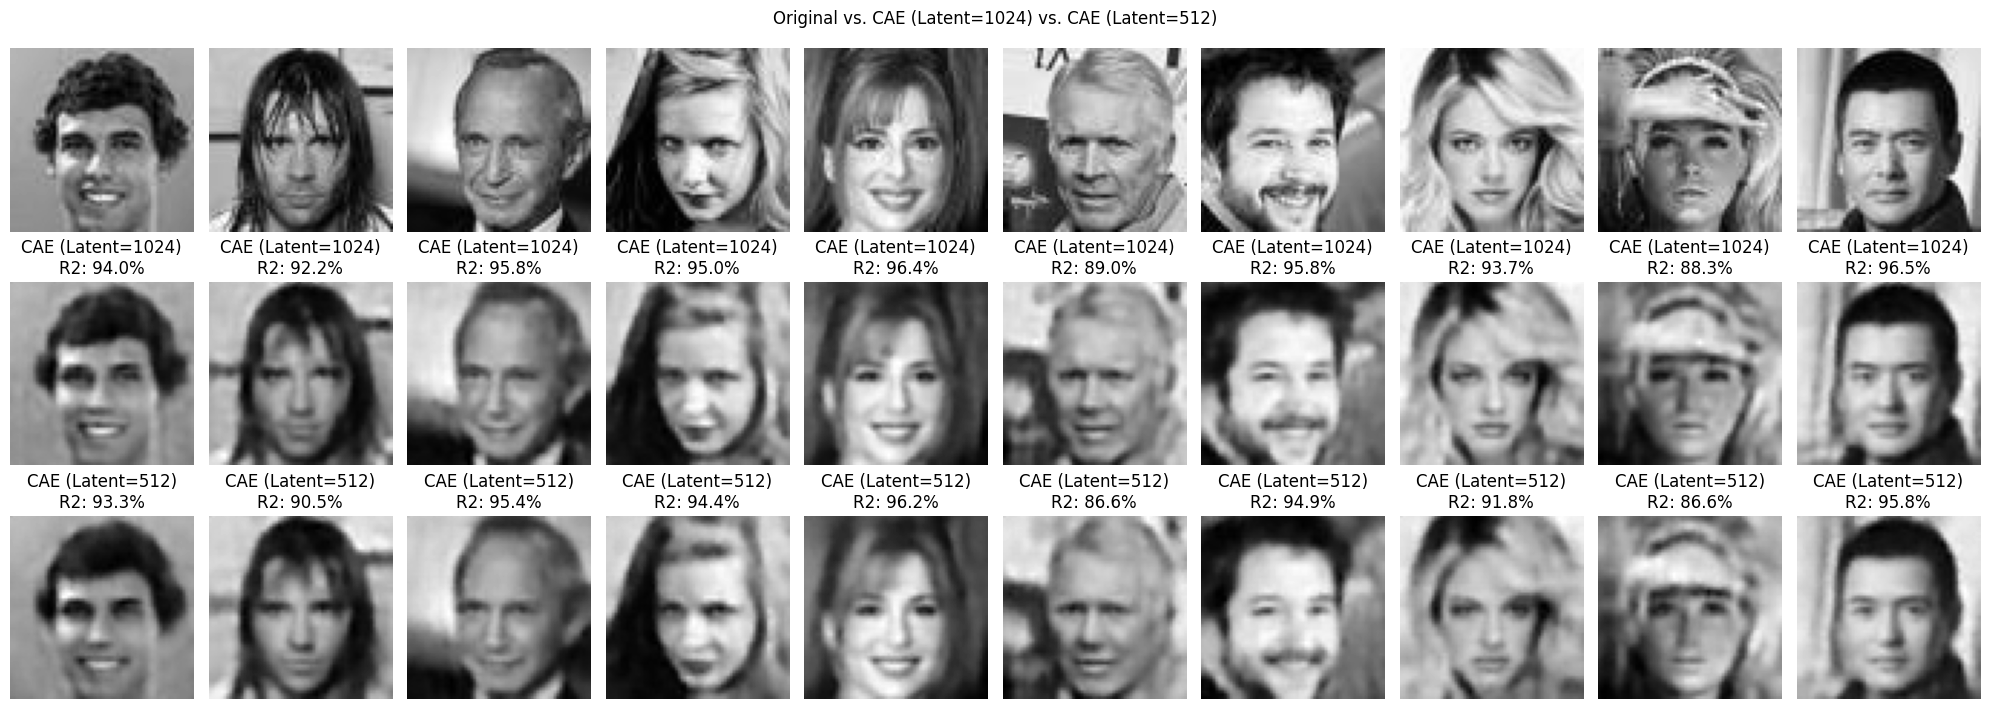

In [130]:
plot_cae_reconstructions_comparison(x_test, reconstructed_imgs_cae, reconstructed_imgs_cae1, r2_CAE_1024, r2_CAE_512, n=10)

**Podemos observar en las métricas y en la visualización de las reconstrucciones que estos modelos tienen capacidades similares aunque uno tenga la mitad de parámetros que el otro (debido a esa reducción de dimensionalidad en el vector 1-d que representa el espacio latente), pero podemos ver que su capacidad de reconstrucción es considerablemente mejor a la que proporcionaban los modelos densos y Sparse, esto es debido a lo anteriormente comentado, la manera en la que se disponen las capas mediante bloques de convolución y aplicación de filtros que serían los pesos de la red (tanto para el Downsampling como para el Upsampling) hace que la red si tenga disponible esta información primordial de relaciones espaciales entre los píxeles lo que le permite reconstruir las imágenes de manera más efectiva.**

**En cuanto a los parámetros entrenables y el tiempo de entrenamiento de estos modelos podemos comentar que contienen un número similar de parámetros con respecto al FC AE, esto es debido a esas capas densas que se emplean en la representación compacta del espacio latente.Sin embargo, es importante comentar que, en la FC AE, si aumentamos el número de neuronas de las distintas capas, el número de parámetros se dispara mientras que en los CAE esto solo ocurre para esas capas densas antes comentadas.**

**Del tiempo de entrenamiento decir que ha sido muy similar también pero teniendo en cuenta que estos modelos son mucho mejor reconstruyendo las imágenes podríamos decir que es mucho más efectivo el tiempo de entrenamiento de estos.**



**E4:** Adapte el código del ejercicio E3 anterior para que funcione con las imágenes RGB en color cargadas del [dataset](#dataset). Experimente con el aumento del número de imágenes de dicho [dataset](#dataset) que se emplean para el entrenamiento, y comente de nuevo de diferencias observadas.

**Los modelos van a ser entrenados para la reconstrucción de imágenes a color(RGB), el único cambio con respecto a la arquitectura anterior es que utilizaremos como datos de entrada tensores con los tres canales correspondientes por lo que el único cambio a añadir en la arquitectura sería fijar la aplicación de 3 filtros en la última capa de convolución transpuesta, la que ya proporciona la salida del modelo. Este cambio es clave ya que la reconstrucción no será de la forma (64, 64, 1) sino que se tiene que mantener los canales RGB (64, 64, 3).**

In [ ]:
INPUT_DIM_SHAPE = images_25k.shape[1:] 
FLATTENED_DIM = np.prod(INPUT_DIM_SHAPE)
EPOCHS = 200 # Número de épocas 
BATCH_SIZE = 32 # Tamaño del lote
LATENT_DIM = 1024

print(INPUT_DIM_SHAPE)

(64, 64, 3)


In [145]:
def build_cae_rgb(input_shape, latent_dim):
    encoder_input = Input(shape=input_shape, name='encoder_input')
    # Encoder
    x = Conv2D(16, (3, 3), strides=2, padding='same')(encoder_input)
    x = Activation('relu')(x)

    x = Conv2D(32, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    shape_before_flattening = tf.keras.backend.int_shape(x)[1:]

    x = Flatten()(x)
    encoder_output = Dense(latent_dim, activation='relu', name='latent_space')(x)
    encoder = Model(encoder_input, encoder_output, name='encoder')

    # Decoder
    decoder_input = Input(shape=(latent_dim,), name='decoder_input')

    target_shape_dense = np.prod(shape_before_flattening)
    x = Dense(target_shape_dense, activation='relu')(decoder_input)
    x = Reshape(shape_before_flattening)(x)

    x = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2DTranspose(16, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    decoder_output = Conv2DTranspose(input_shape[-1], (3, 3), strides=2, padding='same', name='decoder_output')(x)
    decoder = Model(decoder_input, decoder_output, name='decoder')

    # Autoencoder
    autoencoder_output = decoder(encoder(encoder_input))
    autoencoder = Model(encoder_input, autoencoder_output)

    return autoencoder, encoder, decoder

In [142]:
cae_rgb_10k_autoencoder, cae_rgb_10k_encoder, cae_rgb_10k_decoder = build_cae_rgb(INPUT_DIM_SHAPE, LATENT_DIM)
compilacion_y_entrenamiento_AE(cae_rgb_10k_autoencoder, x_train_rgb)

Model: "cae_latent_1024"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 3)]       0         
                                                                 
 encoder (Functional)        (None, 1024)              4219296   
                                                                 
 decoder (Functional)        (None, 64, 64, 3)         4222115   
                                                                 
Total params: 8,441,411
Trainable params: 8,441,123
Non-trainable params: 288
_________________________________________________________________
Epoch 1/200
225/225 [==============================] - 4s 11ms/step - loss: 0.1797 - mae: 0.1797 - val_loss: 0.1423 - val_mae: 0.1423
Epoch 2/200
225/225 [==============================] - 2s 10ms/step - loss: 0.0974 - mae: 0.0974 - val_loss: 0.1019 - val_mae: 0.1019
Epoch 3/200
225/225 [==============

In [147]:
print(x_train_25k.shape)

(20000, 64, 64, 3)


**COMENTAR QUE NO PUEDO ENTRENAR EL MODELO CON MÁS DATOS, SE LLENA LA VRAM DE LA GPU**

In [150]:
cae_rgb_25k_autoencoder, cae_rgb_25k_encoder, cae_rgb_25k_decoder = build_cae_rgb(INPUT_DIM_SHAPE, LATENT_DIM)
compilacion_y_entrenamiento_AE(cae_rgb_25k_autoencoder, x_train_25k[:12000, ...]) # Entrenamos con 16000 imágenes de 25k para evitar problemas de memoria

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 3)]       0         
                                                                 
 encoder (Functional)        (None, 1024)              4219296   
                                                                 
 decoder (Functional)        (None, 64, 64, 3)         4222115   
                                                                 
Total params: 8,441,411
Trainable params: 8,441,123
Non-trainable params: 288
_________________________________________________________________


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

### **Métricas del CAE a color y muestra de algunas imágenes reconstruidas:**

In [ ]:
#Realizamos predicciones mediante los encoders y autoencoders para el cálculo de distintas métricas
reconstructed_imgs_cae_rgb = cae_rgb_10k_autoencoder.predict(x_test_rgb)
encoded_imgs_cae_rgb = cae_rgb_10k_encoder.predict(x_test_rgb)


# Cálculo de métricas de evaluación
# MAE 
mae_CAE_rgb = mean_absolute_error(x_test_rgb.reshape(len(x_test_rgb), -1), reconstructed_imgs_cae_rgb.reshape(len(x_test_rgb), -1))
print(f"\nMAE:")
print(f"  CAE_rgb: {mae_CAE_rgb:.6f}")


# R2 Score 
mean_r2_CAE_rgb, r2_CAE_rgb = calculate_avg_r2(x_test_rgb, reconstructed_imgs_cae_rgb)
print(f"\nR2 Score:")
print(f"  CAE_rgb: {mean_r2_CAE_rgb*100:.2f} %")



63/63 [==============================] - 0s 1ms/step

MAE:
  CAE_rgb: 0.041762

R2 Score:
  CAE_rgb: 94.11 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029226262..1.0415848].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.013375653..0.9807936].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0061856406..1.1278075].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.011214968..1.0368985].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0032976568..1.0736614].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.054572035..0.9077118].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got rang

Text(0.5, 1.02, 'Original vs. Reconstrucción CAE RGB')

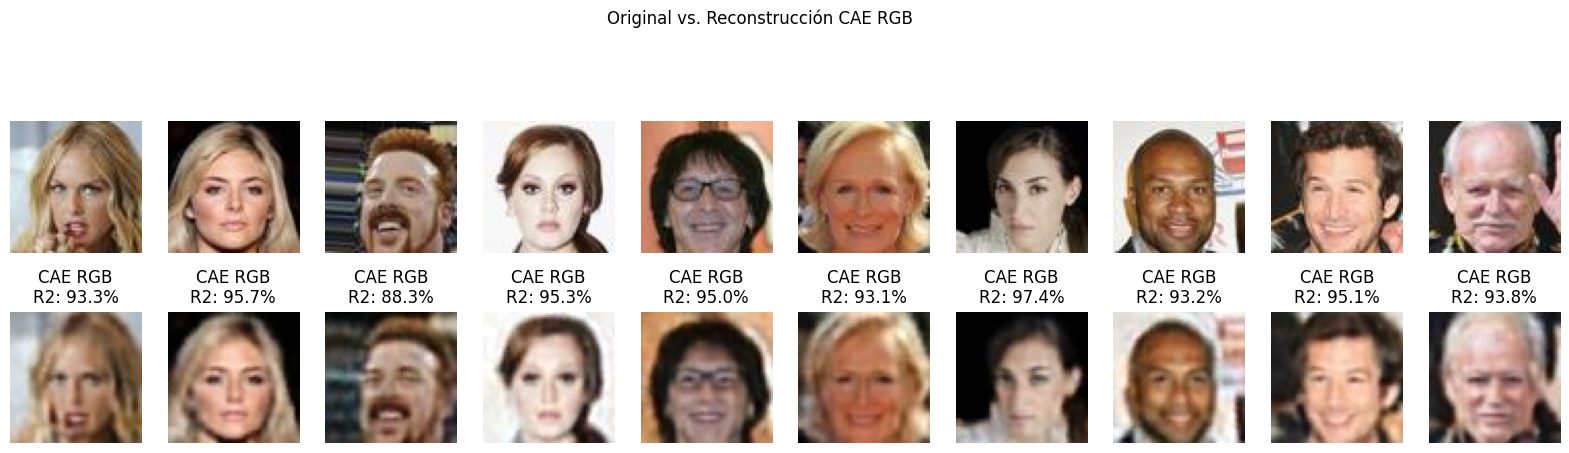

In [170]:
plt.figure(figsize=(20, 7))
    
indices = np.random.choice(len(x_test_rgb), 10, replace=False)

for i, idx in enumerate(indices):
    # Imagen Original
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(np.squeeze(x_test_rgb[idx]))
    
    plt.axis("off")

    # Reconstrucción CAE RGB
    ax = plt.subplot(3, 10, i + 1 + 10)
    plt.imshow(reconstructed_imgs_cae_rgb[idx])
    title_1024 = "CAE RGB" 
    
    title_1024 += f"\nR2: {r2_CAE_rgb[idx]*100:.1f}%" 
    plt.title(title_1024)
    plt.axis("off")
plt.suptitle("Original vs. Reconstrucción CAE RGB", y=1.02) # Título general del gráfico


**Observando las métricas y las muestras reconstruidas podemos ver que el modelo es capaz de reconstruir correctamente los tres canales que componen a las imágenes a color, podríamos obtener un mejor modelo entrenando con más muestras por supuesto, cuanto más datos mejor pero la VRAM de la GPU me limita en este caso. Si pudiera entrenar este mismo modelo pero con más muestras se conseguiría una reconstrucción mucho más fina y se obtendría una métrica de pérdida MAE más baja.**

**E5:** Adapte el código de los ejercicios E3/E4 para que obtener una variante de *autoencoder* convolucional capaz colorear imágenes de nivel de gris. Para ello se tomarán como entradas las imágenes de nivel de gris y como salida las imágenes en color.

**PREPARACIÓN DE DATOS**

In [172]:
x_train_gray = x_train
x_test_gray = x_test
y_train_rgb = x_train_rgb
y_test_rgb = x_test_rgb

print(x_train_gray.shape)
print(x_test_gray.shape)
print(y_train_rgb.shape)
print(y_test_rgb.shape)

(8000, 64, 64, 1)
(2000, 64, 64, 1)
(8000, 64, 64, 3)
(2000, 64, 64, 3)


**Utilizamos la misma arquitectura que en E4 pero ahora cambia el entrenamiendo del modelo, en vez de aprender a reconstruir de gris a gris o de color a color, el modelo va a tratar de aprender a colorear imágenes, es decir, pasar las imágenes en escala de grises como input y obtener esa misma imagen pero en su formato a color.**

**Entonces, en el entrenamiento pasaremos las imágenes en escala de grises como muestras para el entrenamiento y las imágenes a color serán las etiquetas.**

In [178]:
INPUT_DIM_SHAPE = x_train_gray.shape[1:] 
FLATTENED_DIM = np.prod(INPUT_DIM_SHAPE) # 64 * 64 * 1 = 4096
EPOCHS = 200 # Número de épocas 
BATCH_SIZE = 32 # Tamaño del lote
LATENT_DIM = 1024

print(INPUT_DIM_SHAPE)

(64, 64, 1)


**ARQUITECTURA CAE COLOREADOR**

In [190]:
def build_painting_cae(input_shape, latent_dim):
    encoder_input = Input(shape=input_shape, name='encoder_input')
    # Encoder
    x = Conv2D(16, (3, 3), strides=2, padding='same')(encoder_input)
    x = Activation('relu')(x)

    x = Conv2D(32, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    shape_before_flattening = tf.keras.backend.int_shape(x)[1:]

    x = Flatten()(x)
    encoder_output = Dense(latent_dim, activation='relu', name='latent_space')(x)
    encoder = Model(encoder_input, encoder_output, name='encoder')

    # Decoder
    decoder_input = Input(shape=(latent_dim,), name='decoder_input')

    target_shape_dense = np.prod(shape_before_flattening)
    x = Dense(target_shape_dense, activation='relu')(decoder_input)
    x = Reshape(shape_before_flattening)(x)

    x = Conv2DTranspose(32, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2DTranspose(16, (3, 3), strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    decoder_output = Conv2DTranspose(3, (3, 3), strides=2, padding='same', name='decoder_output')(x)
    decoder = Model(decoder_input, decoder_output, name='decoder')

    # Autoencoder
    autoencoder_output = decoder(encoder(encoder_input))
    autoencoder = Model(encoder_input, autoencoder_output)

    return autoencoder, encoder, decoder

In [191]:
cae_painting_autoencoder, cae_painting_encoder, cae_painting_decoder = build_painting_cae(INPUT_DIM_SHAPE, LATENT_DIM)

**MODIFICACIÓN DEL TIPO DE ENTRENAMIENTO DEL MODELO**

In [192]:
# Compilación del modelo
cae_painting_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
cae_painting_autoencoder.summary()

# Entrenamiento del modelo
history = cae_painting_autoencoder.fit(x_train_gray, y_train_rgb,
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE,
                            shuffle=True,
                            validation_split=0.1, # 10% de validación
                            callbacks=[early_stopping],
                            verbose=1)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 1)]       0         
                                                                 
 encoder (Functional)        (None, 1024)              4219008   
                                                                 
 decoder (Functional)        (None, 64, 64, 3)         4222115   
                                                                 
Total params: 8,441,123
Trainable params: 8,440,835
Non-trainable params: 288
_________________________________________________________________
Epoch 1/200
225/225 [==============================] - 3s 11ms/step - loss: 0.1524 - mae: 0.1524 - val_loss: 0.1699 - val_mae: 0.1699
Epoch 2/200
225/225 [==============================] - 2s 9ms/step - loss: 0.0925 - mae: 0.0925 - val_loss: 0.1049 - val_mae: 0.1049
Epoch 3/200
225/225 [=======================

**MUESTRA DE MÉTRICAS Y IMÁGENES EN ESCALA DE GRISES COLOREADAS**

In [194]:
#Realizamos predicciones 
reconstructed_imgs_cae_paint = cae_painting_autoencoder.predict(x_test_gray)

# Cálculo de métricas de evaluación
# MAE 
mae_CAE_paint = mean_absolute_error(y_test_rgb.reshape(len(y_test_rgb), -1), reconstructed_imgs_cae_paint.reshape(len(x_test_gray), -1))
print(f"\nMAE:")
print(f"  CAE_paint: {mae_CAE_paint:.6f}")

# R2 Score 
mean_r2_CAE_paint, r2_CAE_paint = calculate_avg_r2(y_test_rgb, reconstructed_imgs_cae_paint)
print(f"\nR2 Score:")
print(f"  CAE_paint: {mean_r2_CAE_paint*100:.2f} %")

63/63 [==============================] - 0s 6ms/step

MAE:
  CAE_paint: 0.062004

R2 Score:
  CAE_paint: 87.13 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.002557482..1.100608].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.027913962..1.1133442].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0031779562..1.2077835].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00174245..1.0904851].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07617664..1.2292843].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.008225974..0.8885882].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0

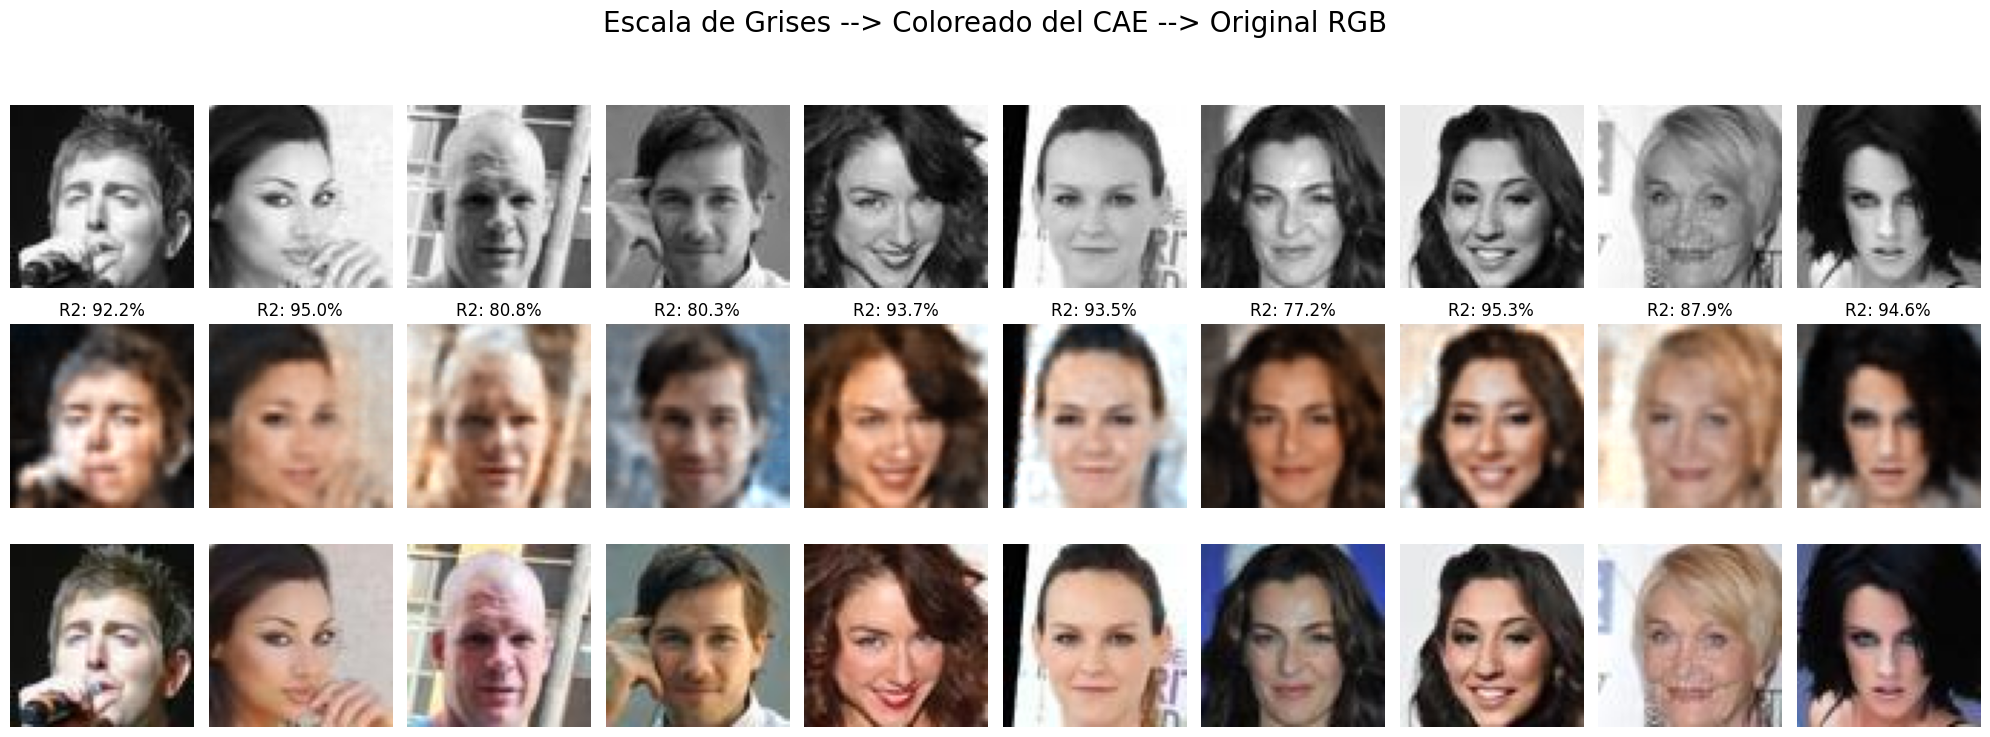

In [204]:
plt.figure(figsize=(20, 7))
    
indices = np.random.choice(len(x_test_gray), 10, replace=False)

for i, idx in enumerate(indices):
    # Originales Escala de grises
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(np.squeeze(x_test_gray[idx]), cmap='gray')
    plt.axis("off")

    # Reconstrucción CAE Painting
    ax = plt.subplot(3, 10, i + 1 + 10)
    plt.imshow(reconstructed_imgs_cae_paint[idx].astype(np.float32))
    title = f"\nR2: {r2_CAE_paint[idx]*100:.1f}%" 
    plt.title(title)
    plt.axis("off")
     
    # Originales RGB
    ax = plt.subplot(3, 10, i + 1 + 2*10)
    plt.imshow(np.squeeze(y_test_rgb[idx]))
    plt.axis("off")
    
    
plt.suptitle("Escala de Grises --> Coloreado del CAE --> Original RGB", size=20, y=1.05) # Título general del gráfico
plt.tight_layout()
plt.show()